# Packages

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# Functions and constants

# Read data

In [2]:
# Load the NetCDF file for all days
all_days_ds = xr.open_dataset('cin_all_days.nc')  
cin_all_days = all_days_ds['cin'].values.flatten()  
cin_all_days = cin_all_days[~np.isnan(cin_all_days)] 

# Load extreme CIN values from CSV 
extreme_csv_path = 'cin_extreme_days.csv'  
try:
    extreme_df = pd.read_csv(extreme_csv_path)
    cin_extreme_days = extreme_df['cin'].dropna().values  
except FileNotFoundError:
    print(f"Warning: {extreme_csv_path} not found. Proceeding with empty extreme days data.")
    cin_extreme_days = np.array([])  

# Analysis

In [3]:
# Compute mean CIN values
mean_all_days = np.mean(cin_all_days) if cin_all_days.size else np.nan
mean_extreme_days = np.mean(cin_extreme_days) if cin_extreme_days.size else np.nan

# Plots

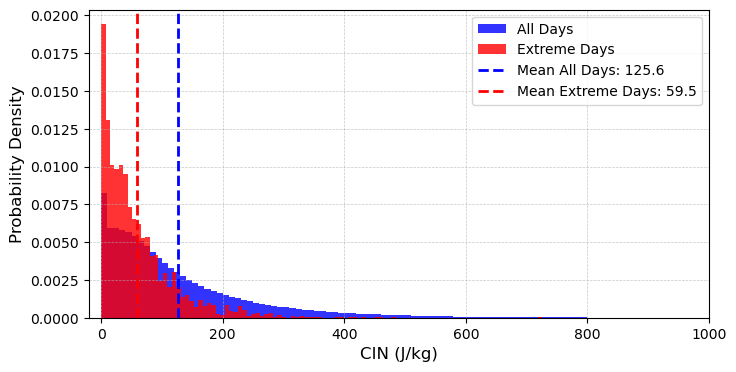

In [6]:
# Create the histogram
plt.figure(figsize=(8, 4))  # Set figure size

# Histogram for all days (blue)
plt.hist(
    cin_all_days, bins=100, density=True, alpha=0.8, color='blue', label='All Days'
)

# Histogram for extreme precipitation days (red)
plt.hist(
    cin_extreme_days, bins=100, density=True, alpha=0.8, color='red', label='Extreme Days'
)

# Plot vertical lines for the means
plt.axvline(mean_all_days, color='blue', linestyle='dashed', linewidth=2, label=f'Mean All Days: {mean_all_days:.1f}')
plt.axvline(mean_extreme_days, color='red', linestyle='dashed', linewidth=2, label=f'Mean Extreme Days: {mean_extreme_days:.1f}')

# Labels and title
plt.xlabel('CIN (J/kg)', fontsize=12)  
plt.ylabel('Probability Density', fontsize=12)
plt.xlim(-20, 1000)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend() 

# Show plot
plt.show()